## Markowitz efficient frontier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas_datareader import data as wb
import scipy.stats as sc
from scipy.stats import norm
%matplotlib inline

In [ ]:
asset_list = ['AXP',	'AMGN',	'PFE',	'SBUX',	'MCD'	,'NFLX',	'GOOG',	'AAPL',	'FB',	'TSLA']

portfolio = pd.DataFrame()

for asset in asset_list:
    portfolio[asset] = wb.DataReader(asset, data_source='yahoo', start='2021-01-07')['Adj Close']

portfolio.head()


,AXP,AMGN,PFE,SBUX,MCD,NFLX,GOOG,AAPL,FB,TSLA
Date,,,,,,,,,,
2021-01-07,121.295418,232.292786,36.661175,102.911873,210.683701,508.890015,1787.250000,130.724655,268.739990,816.039978
2021-01-08,121.415054,236.729797,36.730423,105.222038,214.549911,510.399994,1807.209961,131.852966,267.570007,880.020020
2021-01-11,120.697212,235.816589,37.363533,104.156570,212.919937,499.100006,1766.719971,128.787552,256.839996,811.190002
2021-01-12,121.255539,234.843811,36.779884,102.384117,210.306030,494.250000,1746.550049,128.607819,251.089996,849.440002
2021-01-13,122.033203,235.985321,36.463326,102.453819,210.793030,507.790009,1754.400024,130.694702,251.639999,854.409973


### Calculating Risk and Returns

In [ ]:
# Daily Percentage Returns

stock_returns = portfolio.pct_change(1)
stock_returns = stock_returns.dropna()
stock_returns

,AXP,AMGN,PFE,SBUX,MCD,NFLX,GOOG,AAPL,FB,TSLA
Date,,,,,,,,,,
2021-01-08,0.000986,0.019101,0.001889,0.022448,0.018351,0.002967,0.011168,0.008631,-0.004354,0.078403
2021-01-11,-0.005912,-0.003858,0.017237,-0.010126,-0.007597,-0.022139,-0.022405,-0.023249,-0.040102,-0.078214
2021-01-12,0.004626,-0.004125,-0.015621,-0.017017,-0.012276,-0.009718,-0.011417,-0.001396,-0.022387,0.047153
2021-01-13,0.006413,0.004861,-0.008607,0.000681,0.002316,0.027395,0.004495,0.016227,0.002190,0.005851
2021-01-14,0.011274,0.016489,-0.002984,-0.010399,-0.016927,-0.013647,-0.008105,-0.015127,-0.023844,-0.011013
...,...,...,...,...,...,...,...,...,...,...
2021-04-05,0.010306,0.011438,-0.000551,0.014994,0.016163,0.002317,0.041071,0.023577,0.034320,0.044277
2021-04-06,0.000616,-0.011586,-0.006340,0.019186,0.013371,0.007139,-0.000359,0.002462,-0.008579,0.000825
2021-04-07,0.006706,-0.003934,-0.003883,0.000354,0.003018,0.004518,0.011206,0.013390,0.022301,-0.029857


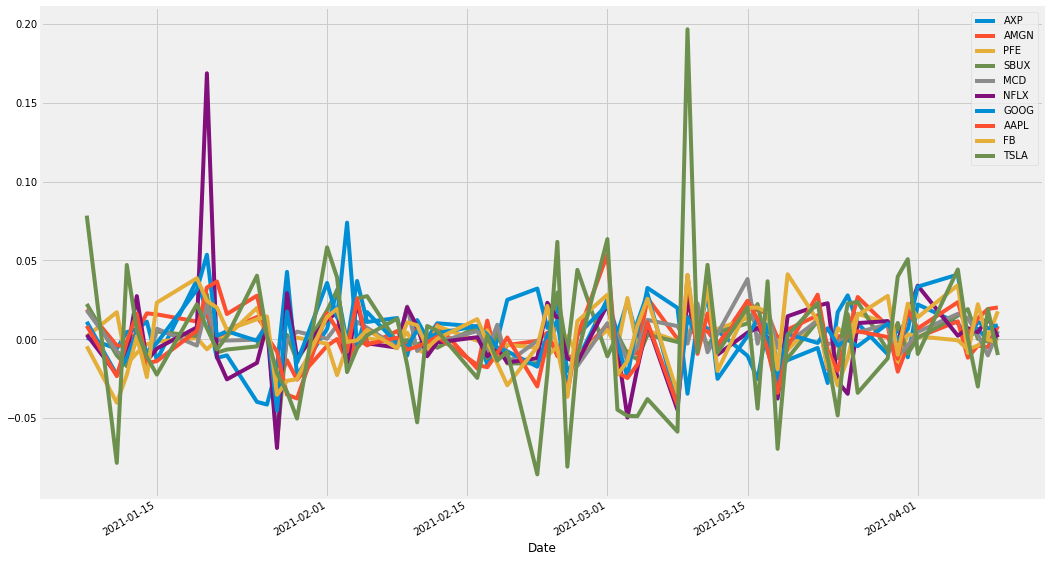

In [ ]:
stock_returns.plot(kind = 'line', figsize = (16,10))

In [ ]:
daily_risk = stock_returns.std()
daily_risk

AXP     0.018827
AMGN    0.012173
PFE     0.009848
SBUX    0.016743
MCD     0.011735
NFLX    0.029540
GOOG    0.019934
AAPL    0.019991
FB      0.020839
TSLA    0.045096
dtype: float64

In [ ]:
monthly_risk = daily_vol*np.sqrt(21)
monthly_risk

AXP     0.086275
AMGN    0.055782
PFE     0.045131
SBUX    0.076725
MCD     0.053777
NFLX    0.135370
GOOG    0.091351
AAPL    0.091609
FB      0.095496
TSLA    0.206657
dtype: float64

In [ ]:
ann_risk = daily_vol*np.sqrt(252)
ann_risk

AXP     0.298867
AMGN    0.193235
PFE     0.156339
SBUX    0.265784
MCD     0.186288
NFLX    0.468935
GOOG    0.316448
AAPL    0.317344
FB      0.330809
TSLA    0.715881
dtype: float64

In [ ]:
ann_returns = ((1+stock_returns).prod()**(252/stock_returns.shape[0])) - 1
ann_returns

AXP     1.203358
AMGN    0.319185
PFE    -0.006658
SBUX    0.462907
MCD     0.457237
NFLX    0.417902
GOOG    1.675916
AAPL    0.071461
FB      0.827463
TSLA   -0.526238
dtype: float64

In [ ]:
(1 + stock_returns.mean())**(252) - 1

AXP     1.301966
AMGN    0.343616
PFE     0.005364
SBUX    0.514790
MCD     0.482271
NFLX    0.572042
GOOG    1.809081
AAPL    0.125778
FB      0.928324
TSLA   -0.394468
dtype: float64

## Minimum risk on Markowitz efficient frontier

In [ ]:
def gmv(cov):
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)

In [ ]:
w_gmv = gmv(cov)
pd.DataFrame({'Weights': w_gmv}, index= stock_returns.columns)

,Weights
AXP,0.158224
AMGN,0.029583
PFE,0.527023
SBUX,0.007015
MCD,0.169043
NFLX,0.000000
GOOG,0.054464
AAPL,0.026382
FB,0.012160
TSLA,0.016105


Text(0.5, 1.0, 'Minimum risk on Markowitz efficient frontier')

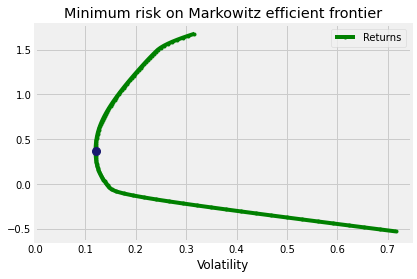

In [ ]:
ax = plot_ef(100, ann_returns, cov*12)
w_gmv = gmv(cov)
ret_gmv = portfolio_return(w_gmv, ann_returns)
vol_gmv = portfolio_vol(w_gmv, cov*12)
ax.plot([vol_gmv], [ret_gmv], color = 'midnightblue', marker= 'o', markersize=8)
ax.set_xlim(left = 0)
ax.set_title('Minimum risk on Markowitz efficient frontier')

In [ ]:
# minimum risk point on curve
ret_gmv, vol_gmv

(0.37162355071351716, 0.12028382844044773)

### Sharpe Ratio

$$ Sharpe Ratio = \frac{R{p} - r_f}{sigma{(p)}} $$

In [ ]:

# We have used the risk free rate here equal to 5% (annual).

daily_sharpe_ratio = ((((1+stock_returns.mean())) - 1))/(stock_returns.std())
sharpe_ratio = daily_sharpe_ratio*(np.sqrt(252*5))
sharpe_ratio

AXP     6.248398
AMGN    3.419885
PFE     0.076510
SBUX    3.496641
MCD     4.727882
NFLX    2.159042
GOOG    7.313292
AAPL    0.834992
FB      4.444351
TSLA   -1.565346
dtype: float64

Sharpe Ratio >= 1 is generally considered to be good.


## Efficient Frontier

<i> The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [ ]:

cov = stock_returns.cov()*21
cov

,AXP,AMGN,PFE,SBUX,MCD,NFLX,GOOG,AAPL,FB,TSLA
AXP,0.007443,0.000372,-0.000211,0.001255,0.000553,0.001539,0.001391,-0.000484,-0.000615,-0.001830
AMGN,0.000372,0.003112,0.001195,0.001123,0.001325,0.002201,0.001221,0.002225,0.002675,0.002190
PFE,-0.000211,0.001195,0.002037,0.000476,0.000769,-0.000409,-0.000127,0.000494,0.000355,-0.000837
SBUX,0.001255,0.001123,0.000476,0.005887,0.002119,0.004537,0.002874,0.002194,0.002482,0.004907
MCD,0.000553,0.001325,0.000769,0.002119,0.002892,0.003168,0.001499,0.001332,0.001862,0.001904
NFLX,0.001539,0.002201,-0.000409,0.004537,0.003168,0.018325,0.007379,0.005798,0.006414,0.008491
GOOG,0.001391,0.001221,-0.000127,0.002874,0.001499,0.007379,0.008345,0.004111,0.005381,0.007104
AAPL,-0.000484,0.002225,0.000494,0.002194,0.001332,0.005798,0.004111,0.008392,0.005752,0.012442
FB,-0.000615,0.002675,0.000355,0.002482,0.001862,0.006414,0.005381,0.005752,0.009120,0.009231
TSLA,-0.001830,0.002190,-0.000837,0.004907,0.001904,0.008491,0.007104,0.012442,0.009231,0.042707


In [ ]:
stock_returns.corr()    

,AXP,AMGN,PFE,SBUX,MCD,NFLX,GOOG,AAPL,FB,TSLA
AXP,1.000000,0.077234,-0.054267,0.189629,0.119142,0.131741,0.176510,-0.061288,-0.074662,-0.102638
AMGN,0.077234,1.000000,0.474754,0.262490,0.441736,0.291466,0.239570,0.435394,0.502157,0.189972
PFE,-0.054267,0.474754,1.000000,0.137380,0.316801,-0.066964,-0.030758,0.119468,0.082478,-0.089712
SBUX,0.189629,0.262490,0.137380,1.000000,0.513645,0.436853,0.410042,0.312147,0.338782,0.309471
MCD,0.119142,0.441736,0.316801,0.513645,1.000000,0.435166,0.305223,0.270378,0.362625,0.171322
NFLX,0.131741,0.291466,-0.066964,0.436853,0.435166,1.000000,0.596744,0.467564,0.496168,0.303503
GOOG,0.176510,0.239570,-0.030758,0.410042,0.305223,0.596744,1.000000,0.491235,0.616847,0.376282
AAPL,-0.061288,0.435394,0.119468,0.312147,0.270378,0.467564,0.491235,1.000000,0.657460,0.657208
FB,-0.074662,0.502157,0.082478,0.338782,0.362625,0.496168,0.616847,0.657460,1.000000,0.467753
TSLA,-0.102638,0.189972,-0.089712,0.309471,0.171322,0.303503,0.376282,0.657208,0.467753,1.000000


In [ ]:

def portfolio_return(weights, er):
    
    return weights.T @ er

# @ -> matrix multiplication

In [ ]:

def portfolio_vol(weights, covmat):
    
    return (weights.T @ covmat @ weights)**0.5

# @ -> matrix multiplication

In [ ]:
from scipy.optimize import minimize

In [ ]:
def minimize_vol(target_return, er, cov):
    '''
    taget_ret -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type' : 'eq',
        'args' : (er,),
        'fun' : lambda weights, er : target_return - portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    results = minimize(portfolio_vol, init_guess,
                       args = (cov,), method = 'SLSQP',
                       options={'disp': False},
                       constraints= (return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [ ]:
def optimal_weights(n_points, er, cov):
    '''
    -> list of weights to run the optimizer on to minimize the vol
    '''
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

In [ ]:
def plot_ef(n_points, er, cov):
    '''
    Plots efficient frontier for a portfolio with multiple assets 
    '''
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = np.array([portfolio_vol(w, cov) for w in weights])
    ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})
    fig = ef.plot(x='Volatility', y='Returns', style='.-', color='green')
    
    return fig

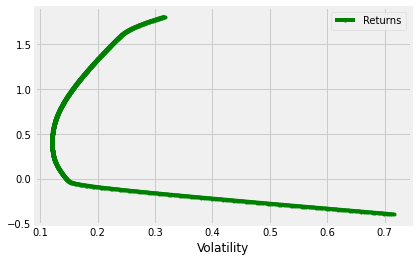

In [ ]:

plot_ef(1000, ((1+stock_returns.mean())**252)-1, cov*12)

## Calculating Max Sharpe Ratio portfolio and CML (Capital Market Line)

In [ ]:
def msr(risk_free_rate, er, cov):
    '''
    Expected returns + Risk-free rate + Cov -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, risk_free_rate, er, cov):
        '''
        Returns the negative sharpe ratio, given weights
        '''
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - risk_free_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args = (risk_free_rate, er,cov,), method = 'SLSQP',
                       options={'disp': False},
                       constraints= (weights_sum_to_1),
                        bounds = bounds
                       )
    return results.x


Text(0.5, 1.0, 'Efficient Frontier and CML')

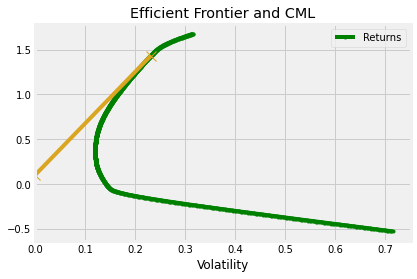

In [ ]:
w_msr = msr(0.1, ann_returns, cov*12)
ret_msr = portfolio_return(w_msr, ann_returns)
vol_msr = portfolio_vol(w_msr, cov*12)
ax = plot_ef(1000, ann_returns, cov*12)

cml_x = [0, vol_msr]
cml_y = [0.1, ret_msr]
ax.plot(cml_x, cml_y, color='goldenrod', marker= 'x', markersize= 10)
ax.set_xlim(left = 0)
ax.set_title('Efficient Frontier and CML')

In [ ]:
ret_msr, vol_msr

(1.4310064792938935, 0.2316469234915995)

In [ ]:
pd.DataFrame({'Weights': w_msr}, index=stock_returns.columns).sort_values(by='Weights')[:]

,Weights
AMGN,0.000000e+00
PFE,0.000000e+00
SBUX,0.000000e+00
FB,0.000000e+00
AAPL,9.329993e-15
NFLX,4.622995e-14
TSLA,5.485852e-14
MCD,4.994089e-02
AXP,3.894703e-01
GOOG,5.605888e-01


## Calculating Beta

In [ ]:
import statsmodels.api as sm
from statsmodels import regression

In [ ]:
nyse=wb.DataReader('NYA', data_source='yahoo', start='2021-01-07')
nyse = nyse[['Close']]
nyse.columns = ['NYSE']

In [ ]:
portfolio = pd.concat([portfolio, nyse], axis=1)
portfolio

,AXP,AMGN,PFE,SBUX,MCD,NFLX,GOOG,AAPL,FB,TSLA,NYSE
Date,,,,,,,,,,,
2021-01-07,121.295418,232.292786,36.661175,102.911873,210.683701,508.890015,1787.250000,130.724655,268.739990,816.039978,14928.799805
2021-01-08,121.415054,236.729797,36.730423,105.222038,214.549911,510.399994,1807.209961,131.852966,267.570007,880.020020,14966.799805
2021-01-11,120.697212,235.816589,37.363533,104.156570,212.919937,499.100006,1766.719971,128.787552,256.839996,811.190002,14938.000000
2021-01-12,121.255539,234.843811,36.779884,102.384117,210.306030,494.250000,1746.550049,128.607819,251.089996,849.440002,15010.299805
2021-01-13,122.033203,235.985321,36.463326,102.453819,210.793030,507.790009,1754.400024,130.694702,251.639999,854.409973,14983.599609
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,146.059998,252.020004,36.279999,111.019997,228.850006,540.669983,2225.550049,125.900002,308.910004,691.049988,15870.299805
2021-04-06,146.149994,249.100006,36.049999,113.150002,231.910004,544.530029,2224.750000,126.209999,306.260010,691.619995,15878.000000
2021-04-07,147.130005,248.119995,35.910000,113.190002,232.610001,546.989990,2249.679932,127.900002,313.089996,670.969971,15838.799805


In [ ]:
stock_returns = portfolio.pct_change(1)[1:]
stock_returns.head()

,AXP,AMGN,PFE,SBUX,MCD,NFLX,GOOG,AAPL,FB,TSLA,NYSE
Date,,,,,,,,,,,
2021-01-08,0.000986,0.019101,0.001889,0.022448,0.018351,0.002967,0.011168,0.008631,-0.004354,0.078403,0.002545
2021-01-11,-0.005912,-0.003858,0.017237,-0.010126,-0.007597,-0.022139,-0.022405,-0.023249,-0.040102,-0.078214,-0.001924
2021-01-12,0.004626,-0.004125,-0.015621,-0.017017,-0.012276,-0.009718,-0.011417,-0.001396,-0.022387,0.047153,0.004840
2021-01-13,0.006413,0.004861,-0.008607,0.000681,0.002316,0.027395,0.004495,0.016227,0.002190,0.005851,-0.001779
2021-01-14,0.011274,0.016489,-0.002984,-0.010399,-0.016927,-0.013647,-0.008105,-0.015127,-0.023844,-0.011013,0.004058


In [ ]:
def beta(i):
    X = stock_returns['NYSE'].values
    Y = stock_returns[str(i)].values
    def linreg(X, Y):
        x = sm.add_constant(X)
        model = regression.linear_model.OLS(Y, x).fit()

        #x = x[:, 1]
        return model.params[0], model.params[1]
    alpha, beta = linreg(X, Y)
    return alpha, beta

In [ ]:
col = np.array(portfolio.columns)
for i in col[:-1]:
    print('Alpha of '+str(i)+':', beta(str(i))[0])
    print('Beta of '+str(i)+':', beta(str(i))[1])
    print('')

Alpha of AXP: 0.002070655362297915
Beta of AXP: 1.2074638997482783

Alpha of AMGN: 0.0005605332721625105
Beta of AMGN: 0.5945366619470873

Alpha of PFE: -0.00016099279194738744
Beta of PFE: 0.17695277315628186

Alpha of SBUX: 0.0007985771234677619
Beta of SBUX: 0.8261117322091558

Alpha of MCD: 0.001016888377478684
Beta of MCD: 0.530350057144008

Alpha of NFLX: 0.0005776118490561279
Beta of NFLX: 1.183896384507105

Alpha of GOOG: 0.0030200477381433512
Beta of GOOG: 1.055579460907589

Alpha of AAPL: -0.00043144087996708493
Beta of AAPL: 0.8756224715737112

Alpha of FB: 0.0018311599680954447
Beta of FB: 0.7555053164491901

Alpha of TSLA: -0.004102968154604187
Beta of TSLA: 2.0531631097885814



For eg, here Beta(TESLA) is 2.05.

This implies that for every 1% change in price of the market (NYSE), the stock of TESLA changes its price by 2.05%. 

In [ ]:
def SecurityMarketLine(rf,betas,labels):
    rm = [x/10 for x in range(10)]
    labels=labels
    color=['r','b','g']

    for i in range(len(betas)):
        assetReturns=[betas[i]*x +rf*(1-betas[i]) for x in rm] 
        plt.plot(rm,assetReturns,label=labels[i],c=color[i])
    
    marketReturn=[1*x +rf*(1-1) for x in rm] 
    plt.xlabel("Market Return")
    plt.legend(loc = 'lower right')
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    plt.show()

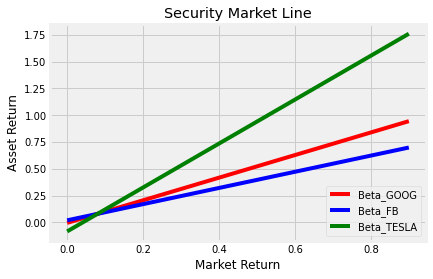

In [ ]:
betas=[1.055,0.755,2.05]
labels=['Beta_GOOG','Beta_FB','Beta_TESLA']
SecurityMarketLine(.08,betas,labels)